In [2]:
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
from Filter import *

np.random.seed(seed=123)

# Background

### Bayes' theorem

Suppose we seek to estimate $X$ given $Y$. The idea of Bayesian estimation is to recursively update our belief about where $X$ should be using information contained in $Y$. Let $Y = (Y_t)_{t>0}$, then suppose at $t=1$ we observe $Y_1$. Using Bayes formula we can estimate $X$ given $Y_1$:

$$ p(X|Y_1) = \frac{p(X,Y_1)}{p(Y_1)} = \frac{p(Y_1|X)p(X)}{p(Y_1)} \propto p(Y_1|X)p(X) $$

We call $p(X|Y_1)$ posterior, $p(Y_1|X)$ likelihood, $p(X)$ prior and $p(Y_1)$ normalisation constant (marginal). Then suppose at $t=2$ we observe $Y_2$, using Bayes formula we update our belief about $X$:

$$ p(X|Y_1,Y_2) = \frac{p(X,Y_1,Y_2)}{p(Y_1,Y_2)} = \frac{p(Y_2|X,Y_1)p(X|Y_1)}{p(Y_2|Y_1)} = \frac{p(Y_2|X,Y_1)p(Y_1|X)p(X)}{p(Y_2|Y_1)p(Y_1)}$$

and so on. Generalising this for updating our belief at time $t$ using incoming observation $Y_t$:

$$ p(X|Y_{1:t}) = \frac{p(Y_t|X,Y_{1:t-1})p(X|Y_{1:t-1})}{p(Y_t|Y_{1:t-1})} \propto p(Y_t|X,Y_{1:t-1})p(X|Y_{1:t-1}) $$

where $Y_{1:t} = Y_1,Y_2,...,Y_t$. 

### Bayes filter

Now let $X = (X_t)_{t\geq0}$ be a process and suppose that for each $t\geq0$, random variable $X_t$ is unobservable (hidden). Whereas outcomes of process $Y = (Y_t)_{t>0}$ are observable and depend on outcomes of $X$ in a known way. We futher assume that current outcomes of $X$ and $Y$ are independent of past outcomes. This is what we call a Hidden Markov Model (HMM), where $X$ is called state process and $Y$ observation process. Formally, we consider the following Markovian nonlinear discrete-time system:

$$ \left\{ \begin{array}{lcll}
x_{t} & = & f(x_{t-1},q_{t-1}) & \text{state equation}\\
y_{t} & = & h(x_{t},r_{t}) & \text{measurement equation}
\end{array}\right. $$

where at time $t\geq0$:

$x_{t}\in\mathbb{R}^{n_{x}}$ is the state of the system

$y_{t}\in\mathbb{R}^{n_{y}}$ is the measurement

$x_{0}\sim p(x_{0})$ is prior for initial estimate of $x_{0}$ 

$x_{t}|x_{t-1}\sim p(x_{t}|x_{t-1})$ is prior for transition from hidden state $x_{t-1}$ to $x_{t}$ 

$y_{t}|x_{t}\sim p(y_{t}|x_{t})$ is likelihood of observing $y_{t}$ given hidden state $x_{t}$ 

$x_{t}|y_{1:t}\sim p(x_{t}|y_{1:t})$ is posterior for estimation of hidden state $x_{t}$ given observations $y_{1:t}$ up to time $t$ 

$q_{t}, r_{t}$ are the state and observation noises (independent of each other) 

$f:\mathbb{R}^{n_{x}}\rightarrow\mathbb{R}^{n_{x}}$ and $h:\mathbb{R}^{n_{x}}\rightarrow\mathbb{R}^{n_{y}}$ are state-transition model and measurement model functions

### Bayesian recursion

The state estimation then is to build an estimate of $x_{t}$ using $y_{1:t}$ at each time $t$. To this end, one's interest then lies in how to capture posterior $p(x_{t}|y_{1:t})$ as new measurements arrive to estimate hidden state $x_{t}$:

$$ x_{t|t}=E\left(\left.f(x_{t})\right|y_{1:t}\right)=\int f(x_{t})p(x_{t}|y_{1:t})dx_{t} $$

We aim to sequentially update the posterior $p(x_{t}|y_{1:t})$ using the following
scheme:

$$ p(x_{t}|y_{1:t})\rightarrow p(x_{t+1}|y_{1:t})\rightarrow p(x_{t+1}|y_{1:t+1}) $$

First step is referred to as prediction step and relies on finding $p(x_{t+1}|y_{1:t})$ given prior $p(x_{t}|y_{1:t})$ and using transition $p(x_{t+1}|x_{t})$. Second step is referred to as updating step and relies on finding posterior $p(x_{t+1}|y_{1:t+1})$ given $p(x_{t+1}|y_{1:t})$ and using observation $y_{t}$ and likelihood $p(y_{t+1}|x_{t+1})$.

By definition of conditional probability joint density is

$$ p(x_{t+1},x_{t},y_{1:t}) = p(x_{t+1}|x_{t},y_{1:t})p(x_{t},y_{1:t}) = p(x_{t+1}|x_{t},y_{1:t})p(x_{t}|y_{1:t})p(y_{1:t}) $$

By Markov property of HMM  

$$ p(x_{t+1},x_{t},y_{1:t}) = p(x_{t+1}|y_{1:t})p(x_{t}|y_{1:t})p(y_{1:t}) $$

Marginalising with respect to $x_{t}$ 

$$\int p(x_{t+1},x_{t},y_{1:t})dx_{t} = p(x_{t+1},y_{1:t}) $$

We obtain

$$ p(x_{t+1}|y_{1:t}) = \frac{p(x_{t+1},y_{1:t})}{p(y_{1:t})} = \frac{\int p(x_{t+1},x_{t},y_{1:t})dx_{t}}{p(y_{1:t})}$$

Hence for prediction step we have

$$ p(x_{t+1}|y_{1:t}) = \int p(x_{t+1}|x_{t})p(x_{t}|y_{1:t})dx_{t}\ \ \ \ \ \  (1) $$

Then on the arrival of $y_{t+1}$ we update our estimate of $x_{t+1}$ using Bayes rule

$$ p(x_{t+1}|y_{1:t+1})=\frac{p(x_{t+1},y_{1:t})}{p(y_{1:t})}=\frac{p(y_{t+1}|x_{t+1},y_{1:t})p(x_{t+1},y_{1:t})}{p(y_{t+1},y_{1:t})}=\frac{p(y_{t+1}|x_{t+1},y_{1:t})p(x_{t+1}|y_{1:t})}{p(y_{t+1}|y_{1:t})} $$

By independence assumption of HMM $y_{t}$ depends on $x_{t}$ only

$$ p(x_{t+1}|y_{1:t+1})=\frac{p(y_{t+1}|x_{t+1})p(x_{t+1}|y_{1:t})}{p(y_{t+1}|y_{1:t})} \propto p(y_{t+1}|x_{t+1})p(x_{t+1}|y_{1:t})\ \ \ \ \ \  (2) $$

Together, (1)-(2) represent the fundamental principle of Bayesian state estimation for the system described in state space model, describing the sequential propagation of the prior and a poster densities. The former (1) captures our belief over the unknown quantities in the presence of only the prior evidence, and the latter (2) updates this belief using the Bayesian theory when new evidence becomes available.

# Kalman filter

### State-space model

Is a special case of Bayes filter where the Markovian discrete-time system is defined as follows:

$$
\left\{ \begin{array}{lcll}
x_{t} & = & F_{t-1}x_{t-1}+q_{t-1} & \text{state equation}\\
y_{t} & = & H_{t}x_{t}+r_{t} & \text{measurement equation}
\end{array}\right.
$$

where at time step $t\geq0$:

$x_{t}\in\mathbb{R}^{n_{x}}$ is the state of the system

$y_{t}\in\mathbb{R}^{n_{y}}$ is the measurement

$x_{0}\sim p(x_{0}) = N(m_{0},P_{0})$ is prior for initial estimate of $x_{0}$ 

$x_{t}|x_{t-1}\sim p(x_{t}|x_{t-1})=N(x_{t};F_{t-1}x_{t-1},Q_{t-1})$ is prior for transition from hidden state $x_{t-1}$ to $x_{t}$ 

$y_{t}|x_{t}\sim p(y_{t}|x_{t})=N(y_{t};H_{t}x_{t},R_{t})$ is likelihood of observing $y_{t}$ given hidden state $x_{t}$ 

$x_{t}|y_{1:t}\sim p(x_{t}|y_{1:t})=N(x_{t};m_{t},P_{t})$ is posterior for estimation of hidden state $x_{t}$ given observations $y_{1:t}$ up to time $t$ 

$q_{t}, r_{t}$ noises are additive and Gaussian $q_{t}\sim N(0,Q_{t})$, $r_{t}\sim N(0,R_{t})$

Here functions $f,h$ are linear and are defined as matrices $H_t,F_t$. 

### Estimation

Using methods explained in Bayesian state estimation and properties of Gaussian random vectors we can obtain analytic expression for:

1) Predicting $x_{t|t-1},P^x_{t|t-1}$ moments of predicting posterior $p(x_{t}|y_{1:t-1})$

$$ x_{t|t-1} = E\left(\left.F_{t}x_{t-1|t-1}\right|y_{1:t-1}\right) = F_t x_{t-1|t-1} $$

$$ y_{t|t-1}=E\left(\left.H_{t}x_{t-1|t-1}\right|y_{1:t-1}\right)=H_{t}x_{t|t-1} $$

$$ P_{t|t-1}^{x}=Cov\left(\left.F_{t}x_{t-1|t-1}\right|y_{1:t-1}\right)+Q_{t}=F_{t}P_{t-1|t-1}^{x}F_{t}^{T}+Q_{t} $$

$$ P_{t|t-1}^{y}=Cov\left(\left.H_{t}x_{t-1|t-1}\right|y_{1:t-1}\right)+R_{t}=H_{t}P_{t|t-1}^{x}H_{t}^{T}+R_{t} $$

$$ P_{t|t-1}^{xy}=Cov\left(\left.F_{t}x_{t-1|t-1},H_{t}x_{t-1|t-1}\right|y_{1:t-1}\right)=P_{t|t-1}^{x}H_{t}^{T} $$

2) Updating $x_{t|t},P^x_{t|t}$ moments of updating posterior $p(x_{t}|y_{1:t})$.

$$ x_{t|t}=E\left(\left.x_{t|t-1}\right|y_{1:t}\right)=x_{t|t-1}+P_{t|t-1}^{xy}\left(P_{t|t-1}^{y}\right)^{-1}\left(y_{t}-y_{t|t-1}\right) $$

$$ P_{t|t}^{x}=Cov\left(\left.x_{t|t-1}\right|y_{1:t}\right)=P_{t|t-1}^{x}+P_{t|t-1}^{xy}\left(P_{t|t-1}^{y}\right)^{-1}\left(P_{t|t-1}^{xy}\right)^{T} $$


### Recursive regression

Suppose we have an $AR(1)$ process:

$$y_t = a + b y_{t-1} + \epsilon_t,\ \epsilon_t\sim N(0,\sigma^{2})   $$

Which we will simulate for $T=200$ steps with $a=0.1$, $b = 0.5$ and $\sigma^{2} = 1$:

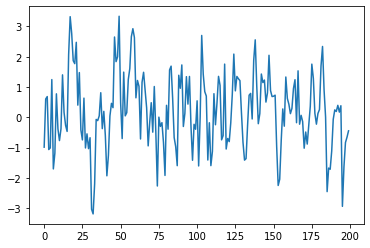

In [3]:
T = 200
a = 0.1
b = 0.5
sig2 = 1
y_ = ar(a,b,sig2,T)
plt.plot(y_)

Performing OLS on this we get:

In [4]:
ols = OLS(y_)
ols.reg()

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(1)   Log Likelihood                -292.413
Method:               Conditional MLE   S.D. of innovations              1.052
Date:                Sun, 30 Apr 2023   AIC                            590.826
Time:                        09:51:52   BIC                            600.706
Sample:                             1   HQIC                           594.824
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1042      0.076      1.377      0.168      -0.044       0.252
y.L1           0.5238      0.060      8.693      0.000       0.406       0.642
                                    Roots           

Before running Kalman Filter on $y$ we define following variables:

In [5]:
#Dims
nx = 2
ny = 1

#State noise cov
Q = 0.001 * np.eye(nx)

#Measurement noise cov
R = 1 * np.eye(ny) #note how incorrect R reduces P estimates accuracy

#Transition model
F = np.eye(nx)

#Observation model
H = np.array([np.ones(T-1),y_[:-1]]).T

#Observations
y = y_[1:]

#Initial estimates for mean and cov
m0 = 0
P0 = 1 * np.eye(nx)

#Pass into class
fltr = Filter(y,T,F,H,Q,R,m0,P0)

Now lets apply a Kalman Filter on $y$ with the goal of finding our coefficients $a$ and $b$

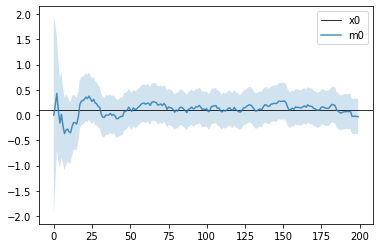

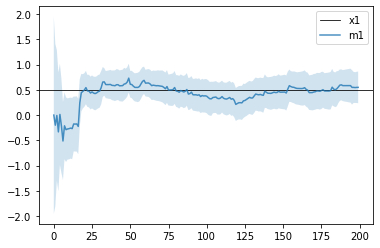

In [6]:
fltr.Kalman()
fltr.plot([a,b])

Notice how confidence intervals at $5\%$ significance decrease as more data is recieved, also notice that estimates do not seem to completely converge to what we get from OLS. Reason for that in Kalman filter we are updating state means and covariances. To obtain OLS equivalent result we set constant state parameter to true:

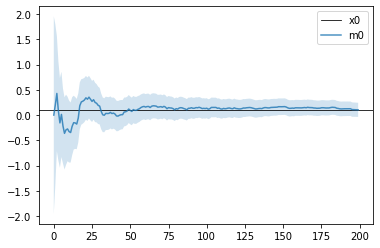

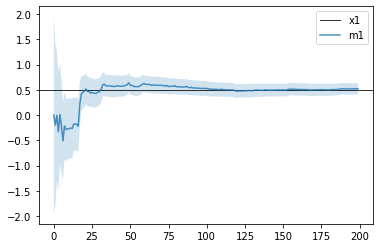

In [7]:
fltr.Kalman(const_x=True)
fltr.plot([a,b])

Which clearly converges to OLS results asymptotically. Notice that covariance of state estimate matches with standard errors from OLS:

In [8]:
#OLS coefficients covariance
ols.stderr

array([[ 0.00572373, -0.00077357],
       [-0.00077357,  0.00363008]])

In [9]:
#Recursive regression coefficients covariance
fltr.P[-1]

array([[ 0.00514703, -0.00069342],
       [-0.00069342,  0.00327031]])

We have defined measurement noise covariance matrix $R$ to match with what is defined in $AR(1)$ process simulation. But what if we did not know this a priori? We can estimate it using Kalman Filter as well by setting estimate covariance to true:

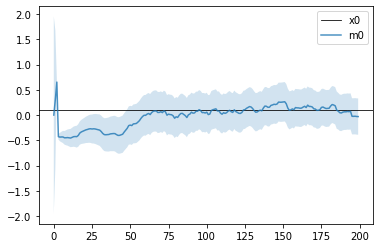

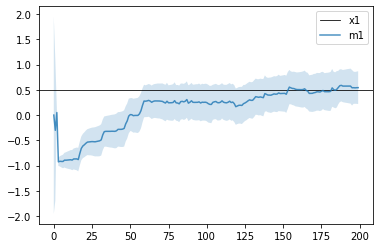

In [10]:
fltr.Kalman(est_cov=True)
fltr.plot([a,b])

In [11]:
#Kalman filter measurement noise variance
fltr.R

1.1121946885518137

In [12]:
#OLS residual variance
ols.resvar

1.1118034110532462

Bayesian filter can deal with missing observations in an intuitive way. If observation is missing, confidence intervals will widen over time until new observation arrives. Suppose we remove $70\%$ of our data and then run Kalman filter

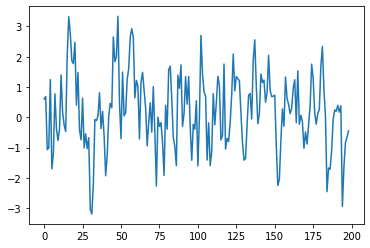

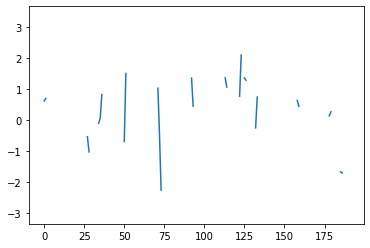

In [13]:
#Censor
y_,H_ = censor(y, H, 0.3, T-1)

plt.plot(y); plt.show()
plt.plot(y_); plt.show()

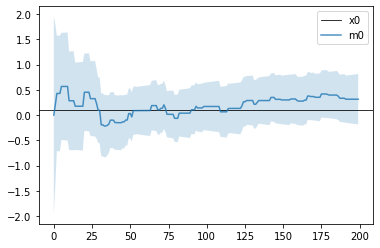

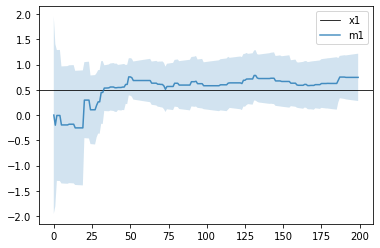

In [14]:
fltr.y = y_
fltr.H = H_

fltr.Kalman()
fltr.plot([a,b])

# Particle filter

### State-space model

Another approach to estimate posterior is to use Monte Carlo (MC) methods, these are known as Particle filters. Strictly speaking, Particle filter is a specific class of an MC method, known as Sequential importance resampling (SIR). For MC methods we consider the following non-linear discrete-time system:

$$
\left\{ \begin{array}{lcll}
x_{t} & = & f(x_{t-1})+q_{t-1} & \text{state equation}\\
y_{t} & = & h(x_{t})+r_{t} & \text{measurement equation}
\end{array}\right.
$$

where at time step $t\geq0$:

$x_{t}\in\mathbb{R}^{n_{x}}$ is the state of the system

$y_{t}\in\mathbb{R}^{n_{y}}$ is the measurement

$x_{0}\sim p(x_{0})$ is prior for initial estimate of $x_{0}$ 

$x_{t}|x_{t-1}\sim p(x_{t}|x_{t-1})$ is prior for transition from hidden state $x_{t-1}$ to $x_{t}$ 

$y_{t}|x_{t}\sim p(y_{t}|x_{t})$ is likelihood of observing $y_{t}$ given hidden state $x_{t}$ 

$x_{t}|y_{1:t}\sim p(x_{t}|y_{1:t})$ is posterior for estimation of hidden state $x_{t}$ given observations $y_{1:t}$ up to time $t$ 

$q_{t}, r_{t}$ noises are additive, but not necessarily Gaussian.

$f:\mathbb{R}^{n_{x}}\rightarrow\mathbb{R}^{n_{x}}$ and $h:\mathbb{R}^{n_{x}}\rightarrow\mathbb{R}^{n_{y}}$ are state-transition model and measurement model functions

### Sampling

The idea behind MC methods is to draw $x_t^{(i)},\ i=1,2,...,N$ particles from the posterior distribution $p(x|y_{1:t})$. In practice, it is often difficult to sample from posterior directly due to complicated (often non-analytic) form. To overcome this problem, we use importance sampling method, which allows to evaluate moments of a particular distribution having samples generated from different distribution (with importance density having same or greater support). This result follows directly from measure theory, specifically Radon–Nikodym theorem. We then work on expectation directly by introducing importance distribution $\pi(\cdot)$, where

$$ E(f(x)|y_{1:t}) = \int f(x)p(x|y_{1:t})dx=\int f(x) \frac{p(x|y_{1:t})}{\pi(x|y_{1:t})} \pi(x|y_{1:t}) dx $$
 
We can then form a Monte Carlo approximation to expectation by drawing $N$ samples from the importance distribution:

$$ x_t^{(i)} \sim \pi(x|y_{1:t}),\ i=1,2,...,N $$

and by forming the approximation to estimate of hidden state $x_t$

$$ E(f(x)|y_{1:t}) \approx \frac{1}{N} \sum_{i=1}^N \frac{p(x^{(i)}|y_{1:t})}{\pi(x^{(i)}|y_{1:t})} f(x^{(i)}) = \sum_{i=1}^N \tilde{w}^{(i)} f(x^{(i)}) $$

where the weights have been defined as

$$ \tilde{w}^{(i)} = \frac{1}{N} \frac{p(x^{(i)}|y_{1:t})}{\pi(x^{(i)}|y_{1:t})},\ i=1,2,...,N  $$

The drawback of this "direct" approach is that evaluating posterior $p(x^{(i)}|y_{1:t})$ is often difficult, specifically from Bayes theory

$$ p(x^{(i)}|y_{1:t}) = \frac{p(y_{1:t}|x^{(i)}) p(x^{(i)}) }{ p(y_{1:t}) } = \frac{p(y_{1:t}|x^{(i)}) p(x^{(i)}) }{ \int p(y_{1:t}|x) p(x) dx },\ i=1,2,...,N  $$

It is not possible to evaluate normalisation constant $p(y_{1:t})$, but we can use importance sampling to also approximate it. It then can be shown that

$$ E(f(x)|y_{1:t}) \approx \sum_{i=1}^N w^{(i)} f(x^{(i)}),\ \ \ \ \ \ \ w^{(i)} = \frac{\tilde{w}^{(i)}}{\sum_{i=1}^N \tilde{w}^{(i)}},\ i=1,2,...,N  $$

The samples then are propagated one-step forward according to

$$ x_{t+1}^{(i)} = f(x_{t}^{(i)}) + q_{t},\ i=1,2,...,N  $$

The sequential importance sampling (SIS), is the case when we update weights sequentially. In practice we Bootstrap (also called Condensation) method is used, where weights are updated using likelihood:

$$ \tilde{w}_t^{(i)} = \tilde{w}_{t-1}^{(i)} p(y_t | x_t^{(i)}) $$

The big problem with SIS and MC filters in general is sample impoverishment that can result in degeneracy. This refers to the scenario that many or even most samples take almost zero weights. Any occurrence of degeneracy renders the affected samples useless. Remedying this situation requires the deployment of resampling, which replaces the samples by new ones drawn from the discrete empirical distribution defined by the weights. The idea is to pass the particle cloud generated at time step $t$ through a survival function, where probability of particle $x_t^{(i)}$ surviving this pass is

$$ p(x_t^{(i)}) = w_t^{(i)} $$

Note that this will result in particles with high weight being duplicated and with low weight being removed. This extra step forms sequential importance resampling (SIR) or Particle filter algorithm. The whole procedure is outlined below:

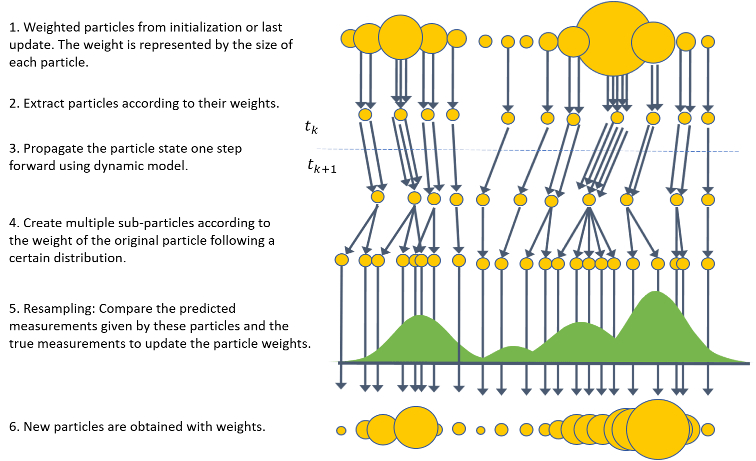

We can estimate latent parameters of AR(1) using Particle filter with Bootstrap method or Optimal importance distribution (OID).

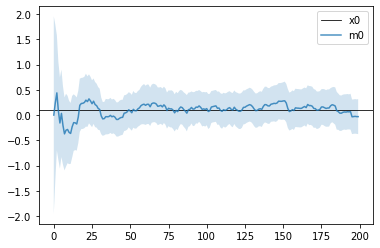

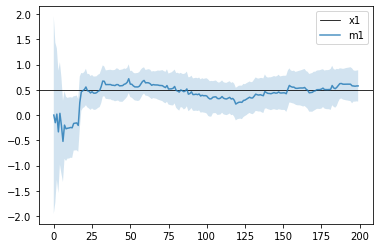

In [15]:
fltr = Filter(y,T,F,H,Q,R,m0,P0)
fltr.Particle()
fltr.plot([a,b])

### Optimal importance distribution

Optimal importance distribution is an importance distribution which reduces weight update step to

$$ \tilde{w}_t^{(i)} = \tilde{w}_{t-1}^{(i)} p(y_t | x_{t-1}^{(i)}) $$

Generally speaking it is not possible to evaluate prior likelihood directly

$$ p(y_{t}|x_{t-1}^{(i)}) = \int p(y_{t}|x_{t}^{(i)}) p(x_{t}|x_{t-1}^{(i)}) dx_{t}^{(i)} $$

Unless likelihood $p(y_{t}|x_{t}^{(i)})$ is conjugate to prior $p(x_{t}|x_{t-1}^{(i)})$. An example when this holds is a special case when state dynamics are non-linear with additive Gaussian noise:

$$ x_{t}=f(x_{t-1})+q_{t},\ q_{t}\sim N(0,Q_{t}) $$

### Conjugate prior

A conjugate prior is one in which the form of the posterior is in the same family of distributions as the prior; with adjusted parameters. This makes computing the posterior distribution much easier. Suppose we have a sample $x_{1:n}$ where we want to infer $\mu,\sigma^{2}$ from likelihood

$$ x_{i}|\mu,\sigma^{2}\sim N(x_{i};\mu,\sigma^{2}),\ i=1,2,...,n $$

Keeping $\sigma^{2}$ fixed and $\mu$ random, them conjugate prior for $\mu$ is

$$ \mu|\mu_{0},\sigma_{0}^{2}\sim N(\mu;\mu_{0},\sigma_{0}^{2}) $$

and posterior for $\mu$ is

$$ \mu|x_{1:n}\sim N\left(\frac{\sigma^{2}\mu_{0}+\sigma_{0}^{2}\sum_{i=1}^{n}x_{i}}{\sigma_{0}^{2}+\sigma^{2}},\frac{\sigma_{0}^{2}\sigma^{2}}{\sigma_{0}^{2}+\sigma^{2}}\right) $$

Keeping $\mu$ fixed and $\sigma^{2}$ random, then conjugate prior for $\sigma^{2}$ is

$$ \sigma^{2}|\alpha,\beta\sim IG(\sigma^{2};\alpha,\beta) $$

and posterior for $\sigma^{2}$ is

$$ \sigma^{2}|x_{1:n}\sim IG\left(\alpha+\frac{n}{2},\beta+\frac{1}{2}\sum_{i=1}^{n}(x_{i}-\mu)^{2}\right) $$

Then joint posterior of parameters $\mu,\sigma^{2}$ is non standard and is derived from Bayes theory

$$ p(\mu,\sigma^{2}|x,\mu_{0},\sigma_{0}^{2},\alpha,\beta)\propto N(\mu;\mu_{0},\sigma_{0}^{2})IG(\sigma^{2};\alpha,\beta)N(x;\mu,\sigma^{2}) $$

Bayesian hierarchy is then flowing from hyperparameters $\mu_{0},\sigma_{0}^{2},\alpha,\beta$ to paramaters $\mu,\sigma^{2}$ and then to samples $x$ is

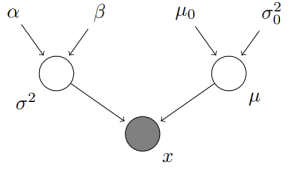

Note that here we have a case of semi-conjugacy, as posterior for $\mu$ is from the same family as the prior.

# Illiquid bond price estimation

Objective is to estimate unobservable mid-yield-to-benchmark (YtB) of a corporate bond from noisy observations of sparse dealer quotes from RFQ responses. We make following assumptions

#### Quotes process (observable)
We have two cases of quote observations $Q_t$ corresponding to an ask-YtB and bid-YtB quotes

$$ Q_t = y_t - \psi_t$$

$$ Q_t = y_t + \psi_t $$

where $y_t$ is mid-YtB and $\psi_t$ is half-spread.

#### Mid-YtB process (hidden)
We model Mid-YtB by process $(y_t)_{t\geq0}$ assuming that

$$ dy_t = \sigma dW_t $$

where $\sigma > 0$ and $W_t$ is Brownian motion. Note that by properties of Brownian motion we have that

$$y_t - y_s \sim N \bigg(0,\sigma^2 dt \bigg),\ t>s$$

#### Half-spread process (hidden)
Suppose we have a mean-reverting process $(x_t)_{t\geq0}$ assuming that

$$ dx_{t} = -Ax_{t}dt + VdB_{t},\ x_0=x$$

We model half-spread by non-negative process $(\psi_t)_{t\geq0}$ assuming that

$$ \psi_t = \Psi e ^ {x_t}$$

where $A,V,Ψ > 0$ and $B_t$ is Brownian motion independent of $W_t$.  Note that by properties of Ornstein–Uhlenbeck processes we have that

$$x_t - x_s \sim N \bigg( x_{s}e^{-A (t-s)}, \frac{1}{2A}\left(1-e^{-2A(t-s)}\right)V^{2} \bigg),\ t>s$$

Going forward we will use following paramaters: 

In [16]:
tau = 1/365
T = 400 #Number of discrete data points
dt = tau/T
PQ = 0.03 #Probability of observing quote for each i = 0,1,...,N

Ψ = 0.05 #Average half-spread
A = 1 #Untransformed spread process mean reversion speed
V = 20 #Untransformed spread process std dev
σ = 0.4 #Bond YtB process std dev
ς = 2*Ψ*0.05 #Measurement std dev

Lets run some simulations and sanity check the distributions

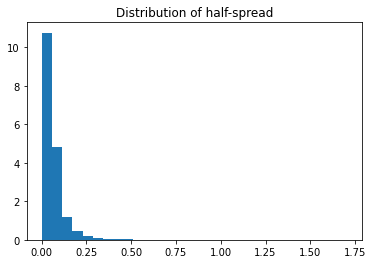

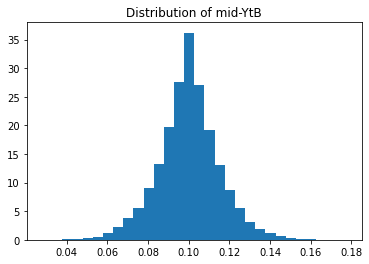

In [17]:
sample_paths = 1000
x_ = np.zeros(T*sample_paths)
y_ = np.zeros(T*sample_paths)

for i in range(sample_paths):
    paths = gp(Ψ,A,V,σ,ς,T,dt,1)
    x_[i*T:(i+1)*T] = paths[0]
    y_[i*T:(i+1)*T] = paths[1]

plt.hist(Ψ*np.exp(x_), density=True, bins=30); plt.title("Distribution of half-spread"); plt.show()
plt.hist((y_), density=True, bins=30); plt.title("Distribution of mid-YtB"); plt.show()

### State-space model
Note that in this model we have 2 hidden states $x_t,y_t$ that we seek to estimate from noisy observations $Q_t$. For brevity lets write out the whole system

$$
\left\{ \begin{array}{lcll}
x_{t} & = & x_{t-1}+\upsilon_{t} & \text{state equation 1}\\
y_{t} & = & y_{t-1}+\eta_{t} & \text{state equation 2}\\
Q_{t} & = & y_{t}\mp\Psi e^{x_{t}}+\epsilon_{t} & \text{measurement equation}
\end{array}\right.
$$

where

$\upsilon_{t}\sim N \bigg( x_{t-1}e^{-A dt}, \frac{1}{2A}\left(1-e^{-2A dt)}\right)V^{2} \bigg) $ is the state 1 noise 

$\eta_{t}\sim \bigg(0,\sigma^2 dt \bigg)$ is the state 2 noise

$\epsilon_{t}\sim N \bigg(0,\varsigma^{2} \bigg)$ is the observation noise

Running particle filter on the system we obtain following results:

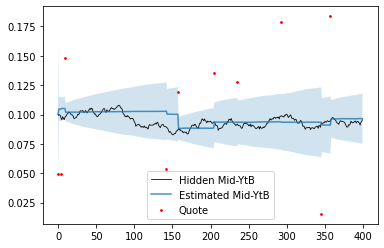

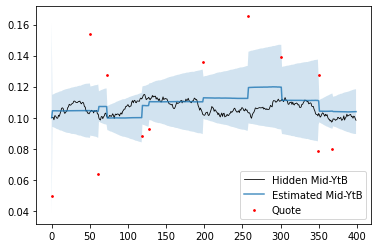

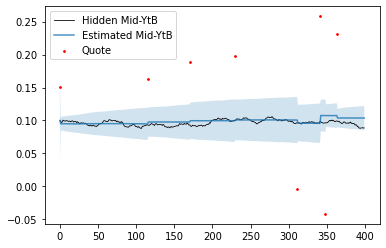

In [18]:
nx = 2
N = 1000 #Number of particles
c = 1

Γ = (V**2 / (2*A)) * (1 - np.exp(-2 * A * dt))  #State 1 noise cov
Σ = σ**2*dt                                     #State 2 noise cov
R = ς**2                                        #Measurement noise cov
                                        
m = np.zeros((T,nx))
P = np.zeros((T,nx,nx))

m[0] = x_[0]
P[0] = 0.001 * np.eye(nx)

F = np.array([[np.exp(-A*dt),0],
              [0,            1]])
Q = np.array([[Γ,0],
              [0,Σ]])


m0 = 0.1
P0 = 0.001 * np.eye(nx)

#-------------------------------------------------------------------------
np.random.seed(None)

for i in range(3):
    
    paths = gp(Ψ,A,V,σ,ς,T,dt,PQ)

    x = np.array([paths[0],paths[1]]).T
    y = np.array(paths[2])
    J = paths[3]

    fltr = Filter(y,T,F,None,Q,R,m0,P0)
    fltr.GP(J, Ψ)
    fltr.plot_GP(x); plt.show()